In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Embedding, LSTM, Dense, Reshape

In [3]:
encodding = {'P': 8, 'C': 19, 'D': 18, 'N': 9, 'Q': 7, 'I': 13, 'S': 5, 'W': 2, 'M': 10, 'G': 15, 'A': 20, 'R': 6, 'F': 16, 'E': 17, 'H': 14, 'T': 4, 'Y': 1, 'V': 3, 'K': 12, 'L': 11, 'NA': 0}


In [2]:
imgt_matrix = pd.read_csv('https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/encodded_imgt_positions.csv')

In [4]:
imgt_matrix_wo_na = imgt_matrix.iloc[:, [0,1,2,3,4,8,9,10,11,12]]

In [5]:
imgt_matrix_wo_na

,P107,P108,P109,P110,P111,P112,P113,P114,P115,P116
0,8,10,3,0,0,0,0,14,15,1
1,5,16,15,5,4,5,9,7,8,7
2,5,5,8,8,11,5,13,6,9,4
3,5,11,20,15,4,8,1,9,17,7
4,5,7,20,6,15,8,20,4,17,20
...,...,...,...,...,...,...,...,...,...,...
17797,5,11,3,4,5,16,15,9,17,7
17798,5,16,15,5,0,0,1,9,17,7
17799,5,14,15,17,4,5,4,18,4,7
17800,5,7,17,17,6,5,9,7,8,7


In [6]:
matrix = imgt_matrix_wo_na.to_numpy()

In [7]:
round(len(matrix)*0.8)

14242

In [8]:
training_set_X = matrix[:round(len(matrix)*0.8),:4]
test_set_X = matrix[round(len(matrix)*0.8):,:4]
training_set_y = matrix[:round(len(matrix)*0.8),4]
test_set_y = matrix[round(len(matrix)*0.8):,4]

In [ ]:
### Predicting the 4th position of the sequences

In [9]:

print("Input sequences (training_set_X):")
print(training_set_X)
print("\nTarget sequences (training_set_y):")
print(training_set_y)

Input sequences (training_set_X):
[[ 8 10  3  0]
 [ 5 16 15  5]
 [ 5  5  8  8]
 ...
 [ 5  8  6 18]
 [ 6 18  4 13]
 [15  8  3  0]]

Target sequences (training_set_y):
[ 0  4 11 ...  0 11  0]


In [10]:

print("Input sequences (test_set_X):")
print(test_set_X)
print("\nTarget sequences (test_set_y):")
print(test_set_y)

Input sequences (test_set_X):
[[ 5  6  4 15]
 [ 5  1  5 12]
 [ 5  8  3 15]
 ...
 [ 5 14 15 17]
 [ 5  7 17 17]
 [ 5 11 20  0]]

Target sequences (test_set_y):
[15  7  6 ...  4  6  0]


### Developing the model and increasing accuracy

In [11]:
# Developing the model and increasing batch size


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Reshape
from tensorflow.keras.optimizers import Adam

# Define parameters
vocab_size = 21  # 20 amino acids
embedding_dim = 8
rnn_units = 32
sequence_length = 4
batch_size = 1  # Use batch size during training only

# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=sequence_length),
    LSTM(rnn_units*2, return_sequences=True),
    Dense(128, activation = "relu"),
    Reshape((sequence_length, 128)),
    LSTM(rnn_units, return_sequences=True),
    Dense(64, activation = "relu"),
    Reshape((sequence_length, 64)),
    LSTM(rnn_units),
    Dense(vocab_size, activation='softmax')

])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              168       
                                                                 
 lstm (LSTM)                 (None, 4, 64)             18688     
                                                                 
 dense (Dense)               (None, 4, 128)            8320      
                                                                 
 reshape (Reshape)           (None, 4, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 32)             20608     
                                                                 
 dense_1 (Dense)             (None, 4, 64)             2112      
                                                                 
 reshape_1 (Reshape)         (None, 4, 64)             0

In [12]:
training_set_y.shape

(14242,)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pickle

# Train the model
history =  model.fit(training_set_X, training_set_y, epochs=1000, batch_size = 32, validation_split =0.2)

# Save the history object
with open('/content/drive/My Drive/training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

Epoch 1/1000
357/357 [==============================] - 26s 26ms/step - loss: 1.7972 - accuracy: 0.5654 - val_loss: 2.0017 - val_accuracy: 0.4542
Epoch 2/1000
357/357 [==============================] - 5s 13ms/step - loss: 1.6330 - accuracy: 0.5670 - val_loss: 1.8783 - val_accuracy: 0.4542
Epoch 3/1000
357/357 [==============================] - 5s 15ms/step - loss: 1.6141 - accuracy: 0.5670 - val_loss: 1.8771 - val_accuracy: 0.4542
Epoch 4/1000
357/357 [==============================] - 5s 15ms/step - loss: 1.6076 - accuracy: 0.5670 - val_loss: 1.8621 - val_accuracy: 0.4542
Epoch 5/1000
357/357 [==============================] - 5s 13ms/step - loss: 1.6027 - accuracy: 0.5669 - val_loss: 1.8721 - val_accuracy: 0.4542
Epoch 6/1000
357/357 [==============================] - 5s 15ms/step - loss: 1.5948 - accuracy: 0.5670 - val_loss: 1.8416 - val_accuracy: 0.4542
Epoch 7/1000
357/357 [==============================] - 5s 15ms/step - loss: 1.5852 - accuracy: 0.5670 - val_loss: 1.8450 - val_a

In [15]:
test_set_X[[0]]

array([[ 5,  6,  4, 15]])

In [16]:
predictions = model.predict(test_set_X[[200]])

# Display the predictions
print("Raw predictions:\n", predictions)


1/1 [==============================] - 2s 2s/step
Raw predictions:
 [[2.3160870e-01 1.2946072e-06 2.5537667e-12 5.8176286e-10 1.9620732e-06
  5.9899437e-04 3.1850250e-05 4.2615136e-07 3.7938187e-06 1.8783394e-10
  2.2049599e-08 5.7919203e-10 9.9991792e-07 1.3571649e-08 5.9010237e-09
  2.9175317e-01 1.3678447e-04 5.5920386e-06 6.0334924e-06 8.9501792e-24
  4.7585037e-01]]


In [17]:
test_set_y[200]

20

In [18]:
# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=-1)

# Display the predicted class labels
print("Predicted class labels:\n", predicted_classes)

Predicted class labels:
 [20]


In [19]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_set_X, test_set_y)


112/112 [==============================] - 1s 5ms/step - loss: 4.0377 - accuracy: 0.3756


In [20]:
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 4.037713527679443
Test Accuracy: 0.37556180357933044


<class 'dict'>


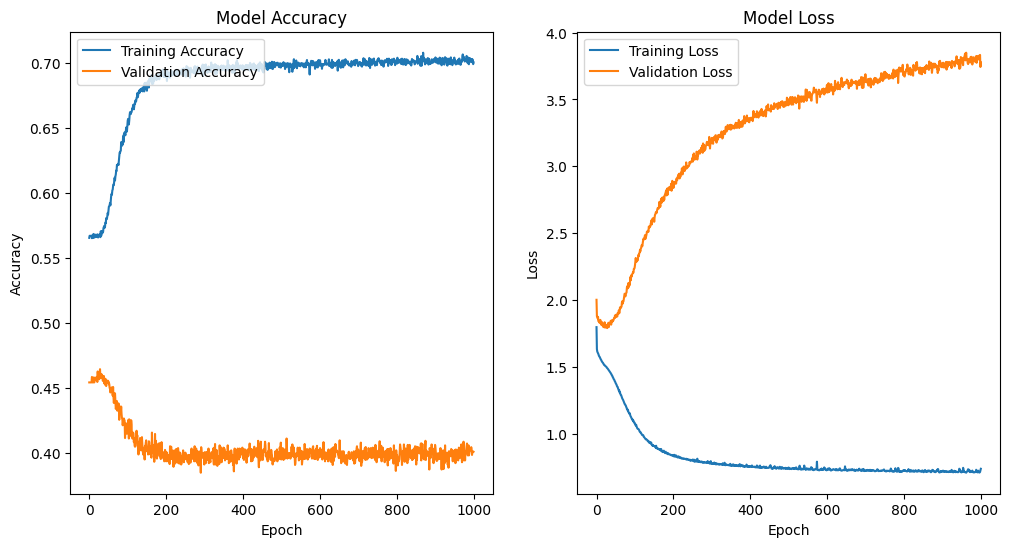

In [21]:
import pickle
import matplotlib.pyplot as plt

# Load the history object
with open('/content/drive/My Drive/training_history.pkl', 'rb') as file:
    history = pickle.load(file)

# Check if 'history' is a dictionary
print(type(history))  # Should output: <class 'dict'>

# Plot the training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()